<a href="https://colab.research.google.com/github/Rahul6158/CODERSCAVE/blob/main/Task_1_(customer_behavior_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Analyzing_Customer_Behavior_Based_On_Transaction_Data)

[**Datasets** Link](https://www.kaggle.com/datasets/iamprateek/store-transaction-data)

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [4]:
ideal_data = pd.read_csv("Hackathon_Ideal_Data.csv")
working_data = pd.read_csv("Hackathon_Working_Data.csv")

In [24]:
target_variable = 'VALUE'
X_train = ideal_data.drop(columns=[target_variable])
y_train = ideal_data[target_variable]
X_test = working_data.drop(columns=[target_variable])
X_train_encoded = pd.get_dummies(X_train, columns=['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'])

# Ensure X_train_encoded and y_train have the same number of samples
min_samples = min(len(X_train_encoded), len(y_train))
X_train_encoded = X_train_encoded[:min_samples]
y_train = y_train[:min_samples]

X_train_encoded, X_val_encoded, y_train, y_val = train_test_split(X_train_encoded, y_train, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)

model = LinearRegression()
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_val_encoded)

# Ensure y_val and y_pred have the same number of samples
min_samples = min(len(y_val), len(y_pred))
y_val = y_val[:min_samples]
y_pred = y_pred[:min_samples]


In [25]:
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6.103029607215841e+21


In [26]:
X_test_encoded = pd.get_dummies(X_test, columns=['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'])
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_test_scaled = scaler.transform(X_test_encoded)

In [32]:
y_pred = model.predict(X_val_encoded)
min_samples = min(len(y_val), len(y_pred))
y_val = y_val[:min_samples]
y_pred = y_pred[:min_samples]
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6.103029607215841e+21


In [36]:
X_test_encoded = pd.get_dummies(X_test, columns=['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'])
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_test_scaled = scaler.transform(X_test_encoded)
working_data[target_variable] = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
working_data.to_csv("Updated_Hackathon_Working_Data.csv", index=False)
validation_data = pd.read_csv("Hackathon_Validation_Data.csv")
print(validation_data.head())

        ID STORECODE MONTH                       GRP
0  1112535        N1    M1       AFTER SHAVE LOTIONS
1  1112539        N1    M1    AGARBATTI & DHOOPBATTI
2  1112543        N1    M1  ALL AIR FRESHNERS(01/03)
3  1112547        N1    M1          ALL IODISED SALT
4  1112551        N1    M1                  ANTACIDS


In [37]:
features = ['ID', 'STORECODE', 'MONTH', 'GRP']
X_validation = validation_data[features]
X_validation_encoded = pd.get_dummies(X_validation, columns=['STORECODE', 'MONTH', 'GRP'])
X_validation_encoded = X_validation_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_validation_scaled = scaler.transform(X_validation_encoded)
predicted_totalvalue = model.predict(X_validation_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
submission_df = pd.DataFrame({
    'ID': validation_data['ID'],
    'TOTALVALUE': range(len(predicted_totalvalue))
})
submission_df.index = range(len(submission_df))
smallest_id = submission_df.head(9)
print(smallest_id)

        ID  TOTALVALUE
0  1112535           0
1  1112539           1
2  1112543           2
3  1112547           3
4  1112551           4
5  1112555           5
6  1112559           6
7  1112563           7
8  1112567           8


In [43]:
smallest_id.to_csv('submission.csv', index=False)
print(ideal_data.describe())

                QTY         VALUE
count  14260.000000  14260.000000
mean      16.354488    294.455330
std       34.365583    760.129558
min        0.000000      0.000000
25%        1.000000     10.000000
50%        4.000000     99.000000
75%       16.000000    283.000000
max      641.000000  24185.000000


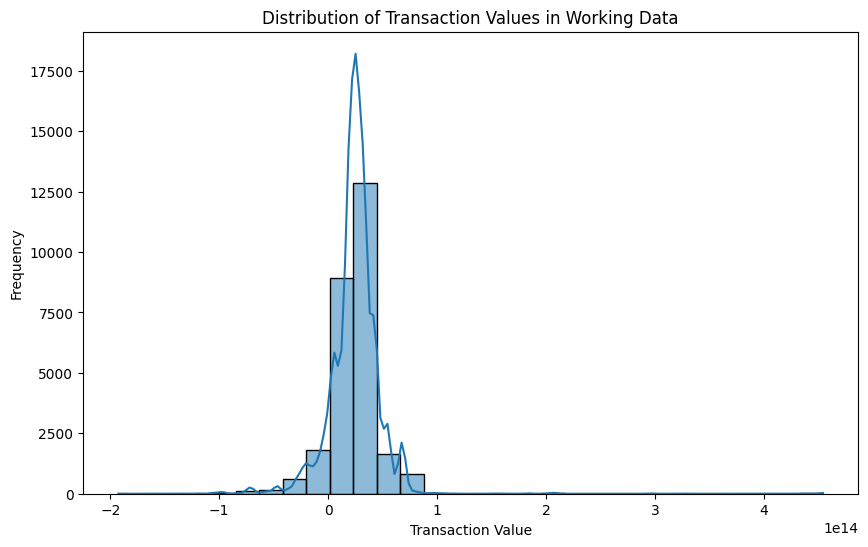

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(working_data['VALUE'], bins=30, kde=True)
plt.title('Distribution of Transaction Values in Working Data')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()


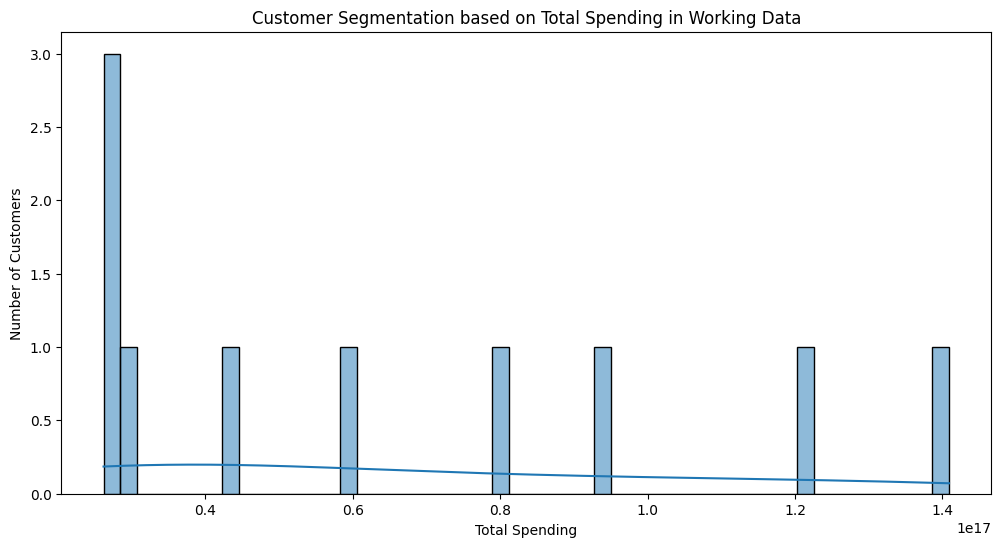

In [47]:
customer_segments_working = working_data.groupby('STORECODE')['VALUE'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.histplot(customer_segments_working['VALUE'], bins=50, kde=True)
plt.title('Customer Segmentation based on Total Spending in Working Data')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()

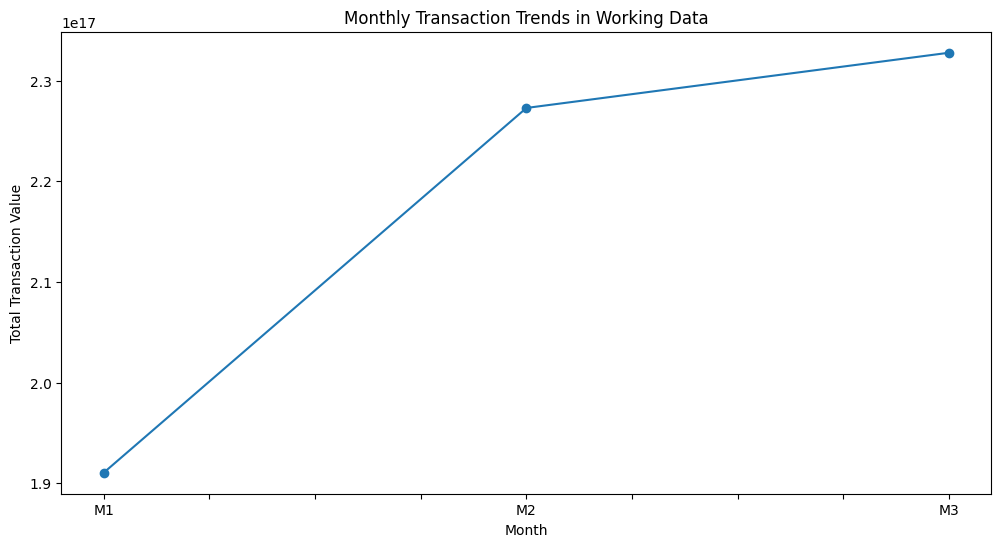

In [48]:
monthly_trends_working = working_data.groupby('MONTH')['VALUE'].sum()
plt.figure(figsize=(12, 6))
monthly_trends_working.plot(marker='o')
plt.title('Monthly Transaction Trends in Working Data')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value')
plt.show()

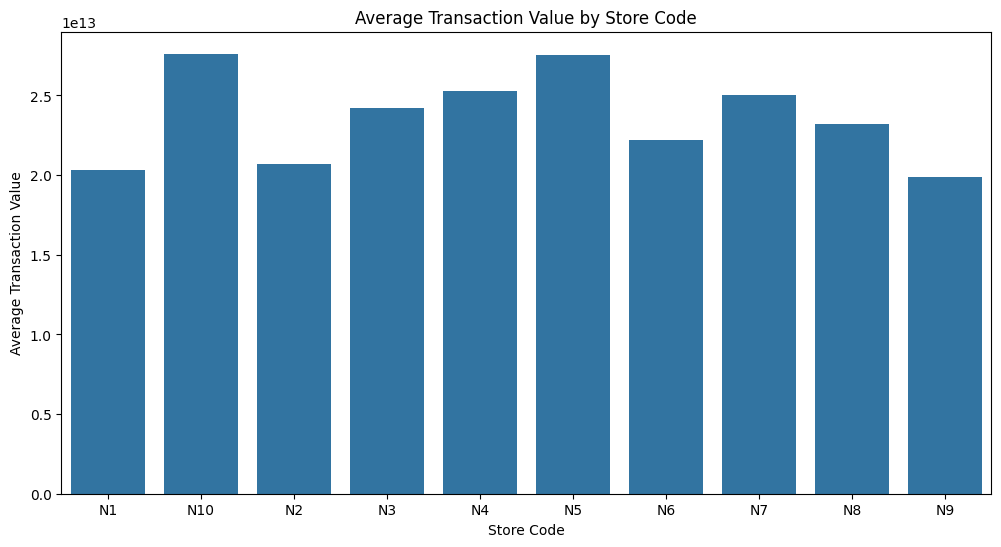

In [50]:
average_value_by_store = working_data.groupby('STORECODE')['VALUE'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='STORECODE', y='VALUE', data=average_value_by_store)
plt.title('Average Transaction Value by Store Code')
plt.xlabel('Store Code')
plt.ylabel('Average Transaction Value')
plt.show()

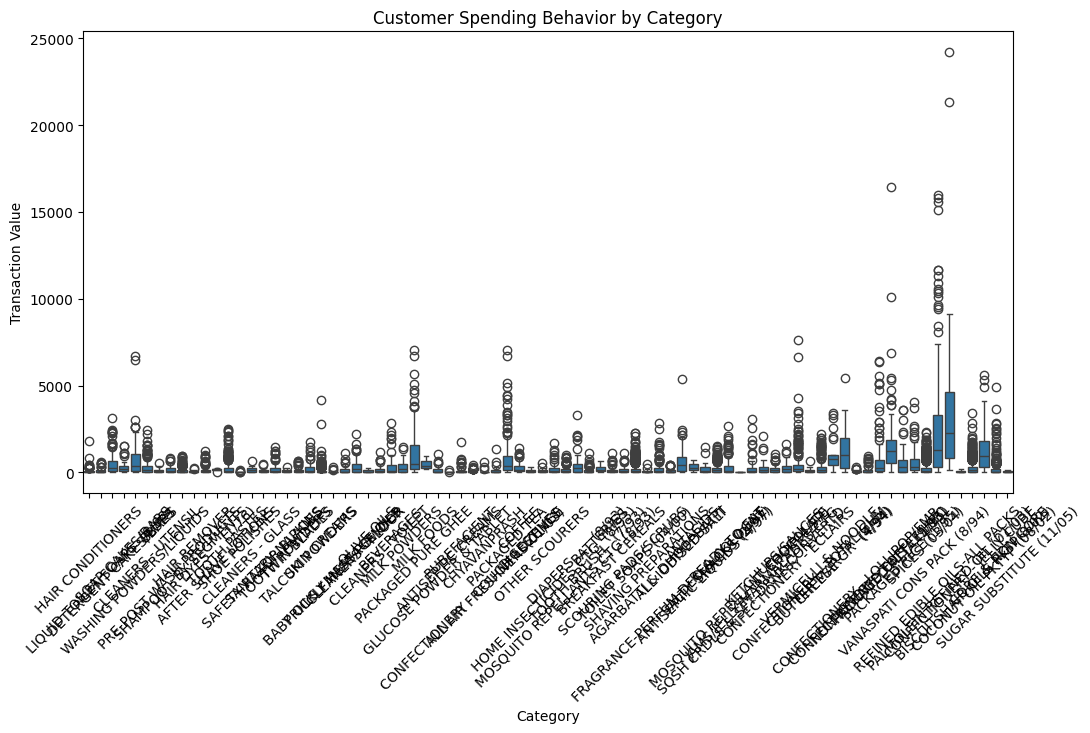

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='GRP', y='VALUE', data=ideal_data)
plt.title('Customer Spending Behavior by Category')
plt.xlabel('Category')
plt.ylabel('Transaction Value')
plt.xticks(rotation=45)
plt.show()

<ipython-input-52-6dd5b1d3631d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='MONTH', y='QTY', data=ideal_data, estimator='sum', ci=None)


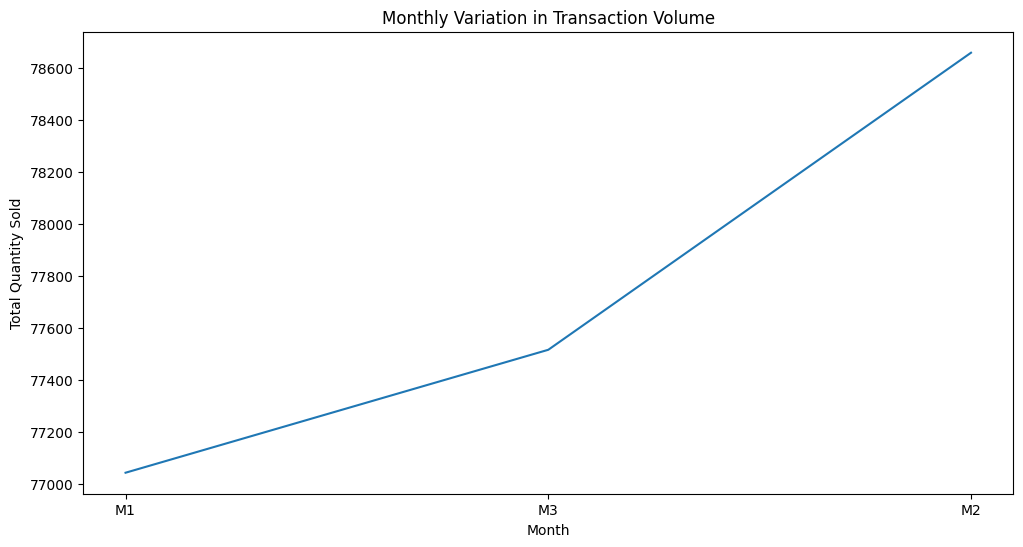

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTH', y='QTY', data=ideal_data, estimator='sum', ci=None)
plt.title('Monthly Variation in Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

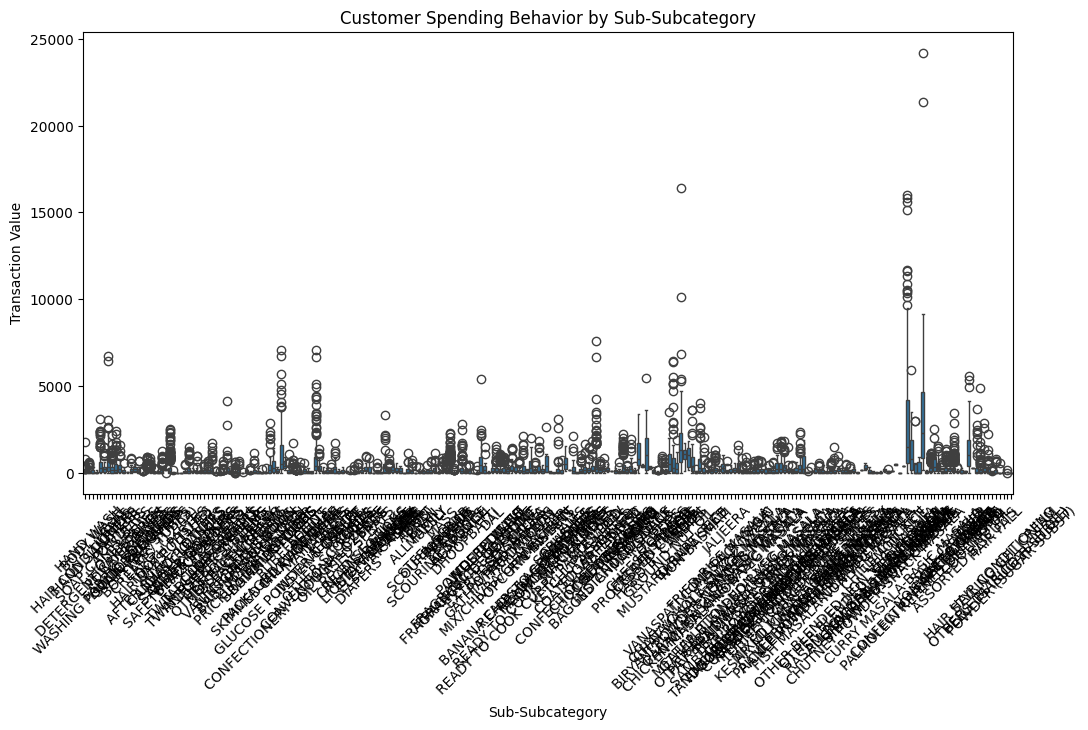

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='SSGRP', y='VALUE', data=ideal_data)
plt.title('Customer Spending Behavior by Sub-Subcategory')
plt.xlabel('Sub-Subcategory')
plt.ylabel('Transaction Value')
plt.xticks(rotation=45)
plt.show()